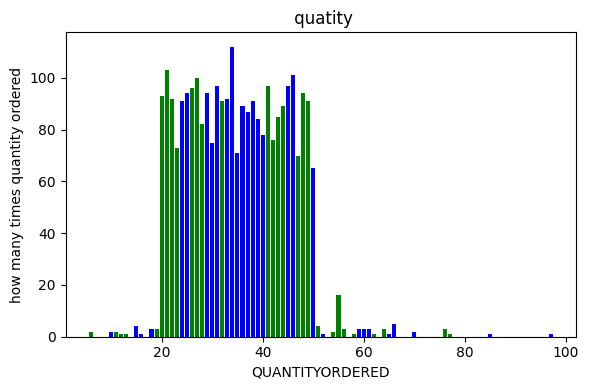

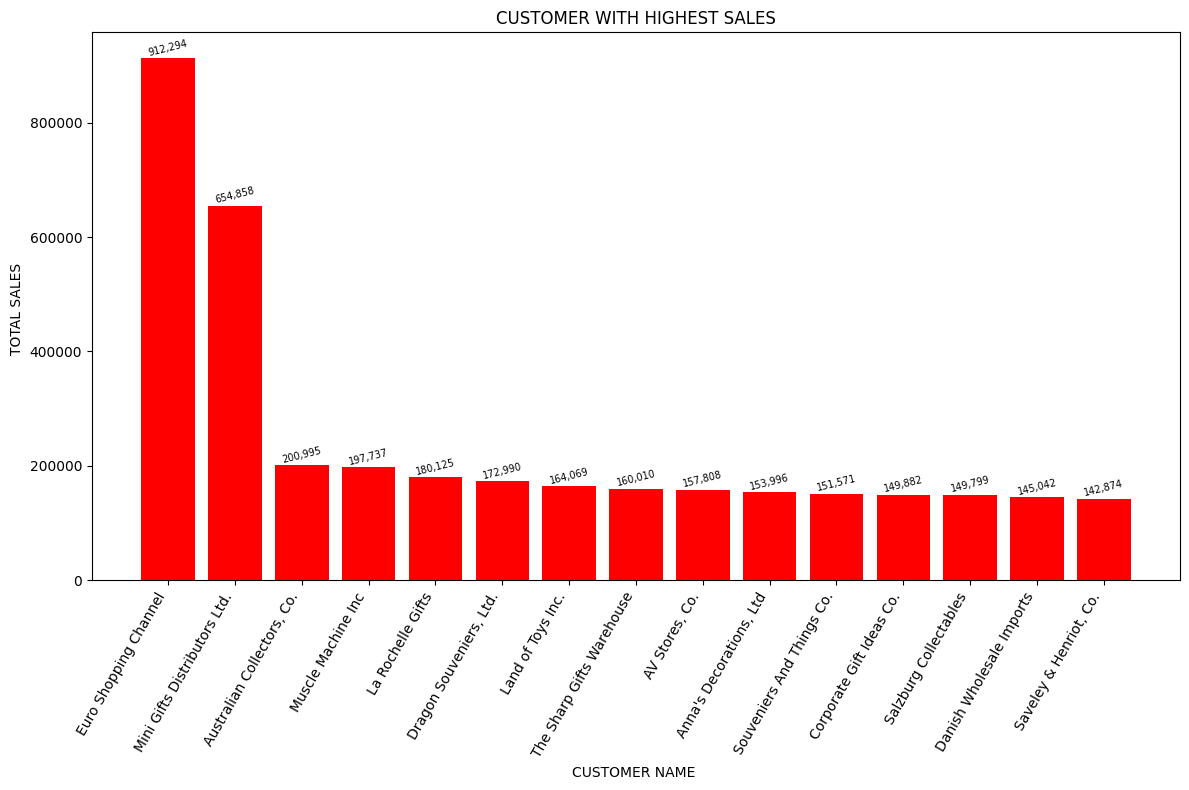

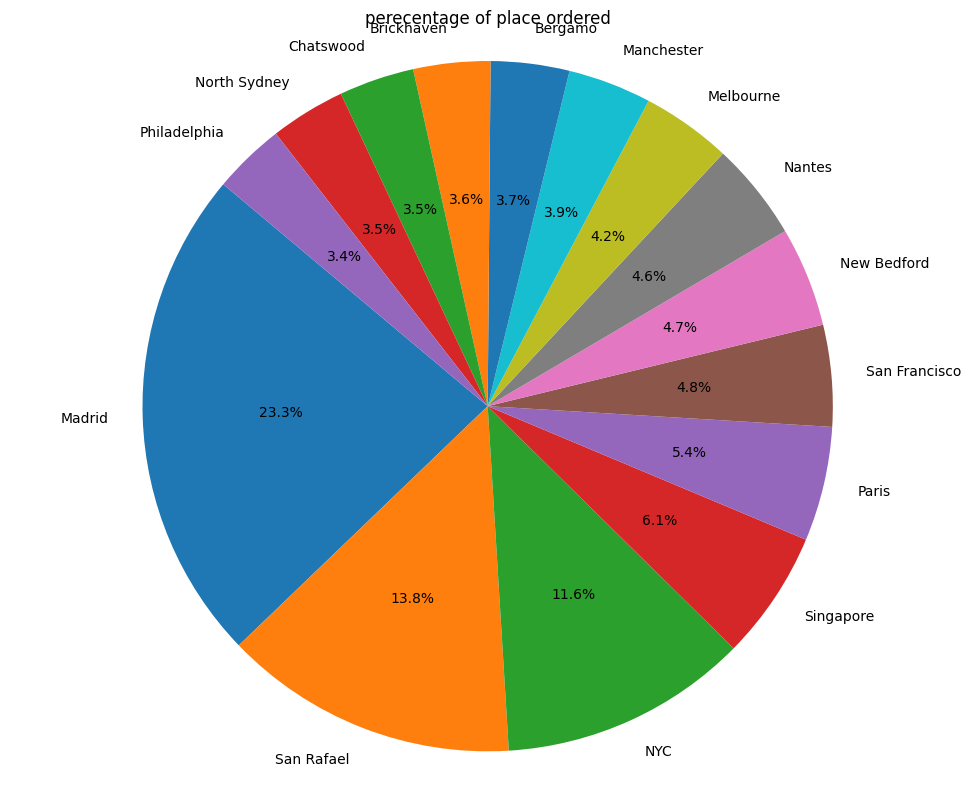

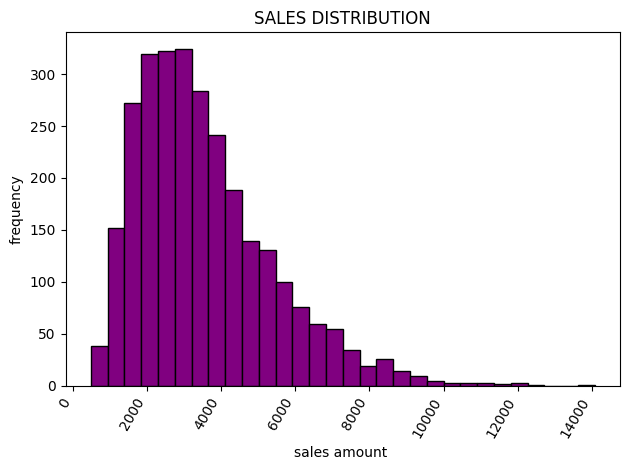

In [20]:
import pandas as pd 
import matplotlib . pyplot as plt 

df = pd.read_csv("sales_data_sample.csv",encoding="latin1")
#cleaning data
COLUMNS=['ORDERNUMBER','QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER','SALES','ORDERDATE','STATUS','QTR_ID','MONTH_ID','YEAR_ID','PRODUCTLINE','MSRP','PRODUCTCODE','CUSTOMERNAME','PHONE','ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','POSTALCODE','COUNTRY','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','DEALSIZE']
numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude="number").columns


df[numeric_columns]=df[numeric_columns].fillna(df[numeric_columns].mean())
for col in non_numeric_columns:
    df[col] = df[col].fillna("unknown")


#bar chart
type_counts = df['QUANTITYORDERED'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['blue','green'])
plt.title(" quatity")
plt.xlabel("QUANTITYORDERED")
plt.ylabel("how many times quantity ordered")
plt.tight_layout()
plt.show()
#bar chart 
quantity = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False)
top_customer = quantity.head(15)
plt.figure(figsize=(12,8))
bars = plt.bar(top_customer.index,top_customer.values,color = ["red"])
plt.title("CUSTOMER WITH HIGHEST SALES")
plt.xlabel("CUSTOMER NAME ")
plt.ylabel("TOTAL SALES ")
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=7, rotation=14)
        
plt.show()




#pie chart 
CITY_COUNTS = df["CITY"].value_counts().head(15)
plt.figure(figsize=(10,8))
plt.pie(CITY_COUNTS,labels=CITY_COUNTS.index,autopct='%1.1f%%',startangle=140)
plt.title("perecentage of place ordered")
plt.axis("equal")
plt.tight_layout()
plt.show()

#histogram chart 
plt.Figure(figsize=(8,6))
plt.hist(df["SALES"], bins=30,color="purple",edgecolor = "black")
plt.title("SALES DISTRIBUTION")
plt.xlabel("sales amount ")
plt.ylabel("frequency")
plt.xticks(rotation= 60 ,ha = "right")
plt.tight_layout()
plt.show()

